In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('QVI_transaction_data.xlsx')

In [4]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [6]:
df=df[df['DATE'].between('2018-07-01','2019-06-30')]
df=df.sort_values('DATE',ascending=True)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
100938,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4


In [7]:
df['PROD_NAME'].describe

<bound method NDFrame.describe of 100938                Pringles Sweet&Spcy BBQ 134g
65566        GrnWves Plus Btroot & Chilli Jam 180g
43733     Infuzions Thai SweetChili PotatoMix 110g
175455        Kettle Tortilla ChpsFeta&Garlic 150g
205813         RRD SR Slow Rst     Pork Belly 150g
                            ...                   
40823     Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
249581      Tyrrells Crisps     Ched & Chives 165g
78296                         Twisties Chicken270g
121166      Cobs Popd Sour Crm  &Chives Chips 110g
170071     Natural Chip Co     Tmato Hrb&Spce 175g
Name: PROD_NAME, Length: 264836, dtype: object>

In [8]:
df['PROD_NAME'][5]

'Old El Paso Salsa   Dip Tomato Mild 300g'

In [9]:
x=df['PROD_NAME'][2]
x

'Smiths Crinkle Cut  Chips Chicken 170g'

In [10]:
import re

In [11]:
x=re.sub('[1234567890&]','',x)
x

'Smiths Crinkle Cut  Chips Chicken g'

In [12]:
df['PROD_NAME']=df['PROD_NAME'].apply( lambda x:re.sub('[$#&]','',x))

In [13]:
df["PROD_NAME"]

100938                 Pringles SweetSpcy BBQ 134g
65566         GrnWves Plus Btroot  Chilli Jam 180g
43733     Infuzions Thai SweetChili PotatoMix 110g
175455         Kettle Tortilla ChpsFetaGarlic 150g
205813         RRD SR Slow Rst     Pork Belly 150g
                            ...                   
40823      Cobs Popd Swt/Chlli Sr/Cream Chips 110g
249581       Tyrrells Crisps     Ched  Chives 165g
78296                         Twisties Chicken270g
121166       Cobs Popd Sour Crm  Chives Chips 110g
170071      Natural Chip Co     Tmato HrbSpce 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [14]:
df1=df[df['PROD_NAME'].str.contains('Chip',case=False)]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
17681,2018-07-01,18,18221,15451,80,Natural ChipCo Sea Salt Vinegr 175g,1,3.0
120377,2018-07-01,39,39200,35859,96,WW Original Stacked Chips 160g,2,3.8
179914,2018-07-01,165,165283,166726,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
60843,2018-07-01,102,102120,102241,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
87284,2018-07-01,91,91313,90332,78,Thins Chips Salt Vinegar 175g,2,6.6
...,...,...,...,...,...,...,...,...
13204,2019-06-30,181,181110,183035,44,Thins Chips Light Tangy 175g,2,6.6
242449,2019-06-30,53,53172,47429,75,Cobs Popd Sea Salt Chips 110g,2,7.6
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli Sr/Cream Chips 110g,2,7.6
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm Chives Chips 110g,2,7.6


In [15]:
df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil  Pesto 175g      3304
Kettle Tortilla ChpsHnyJlpno Chili 150g    3296
Cobs Popd Swt/Chlli Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched  Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g             3265
                                           ... 
RRD Pc Sea Salt     165g                   1431
Woolworths Medium   Salsa 300g             1430
NCC Sour Cream     Garden Chives 175g      1419
French Fries Potato Chips 175g             1418
WW Crinkle Cut      Original 175g          1410
Name: PROD_NAME, Length: 114, dtype: int64

In [16]:
df1=df[~df['PROD_NAME'].str.contains('SALSA',case=False)]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
100938,2018-07-01,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4
...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli Sr/Cream Chips 110g,2,7.6
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched Chives 165g,1,4.2
78296,2019-06-30,212,212068,210874,113,Twisties Chicken270g,2,9.2
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm Chives Chips 110g,2,7.6


In [17]:
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [19]:
df1[df1["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [20]:
df1[df1["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [21]:
df1=df1[df1["LYLTY_CARD_NBR"]!=226000]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
100938,2018-07-01,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4
...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli Sr/Cream Chips 110g,2,7.6
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched Chives 165g,1,4.2
78296,2019-06-30,212,212068,210874,113,Twisties Chicken270g,2,9.2
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm Chives Chips 110g,2,7.6


In [22]:
df1.groupby(['DATE']).count()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673


In [23]:
btw=df1[df1['DATE'].between('2018-07-01','2019-06-30')]


In [24]:
df1['Pack size']=df1['PROD_NAME'].apply(lambda x:x[len(x)-4:])
df1['Pack size']

C:\Users\Dell\AppData\Local\Temp\ipykernel_17088\1576335696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pack size']=df1['PROD_NAME'].apply(lambda x:x[len(x)-4:])


100938    134g
65566     180g
43733     110g
175455    150g
205813    150g
          ... 
40823     110g
249581    165g
78296     270g
121166    110g
170071    175g
Name: Pack size, Length: 246740, dtype: object

In [25]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack size
100938,2018-07-01,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7,134g
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,180g
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110g
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,150g
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150g
...,...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli Sr/Cream Chips 110g,2,7.6,110g
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched Chives 165g,1,4.2,165g
78296,2019-06-30,212,212068,210874,113,Twisties Chicken270g,2,9.2,270g
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm Chives Chips 110g,2,7.6,110g


In [26]:
x=df1['Pack size'].apply(lambda x:'na' if x=='Salt' else x)
x.value_counts().unique

<bound method Series.unique of 175g    64929
150g    38705
134g    25102
110g    22387
170g    19983
165g    15297
330g    12540
380g     6416
270g     6285
200g     4473
na       3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: Pack size, dtype: int64>

<AxesSubplot:xlabel='Pack size', ylabel='Count'>

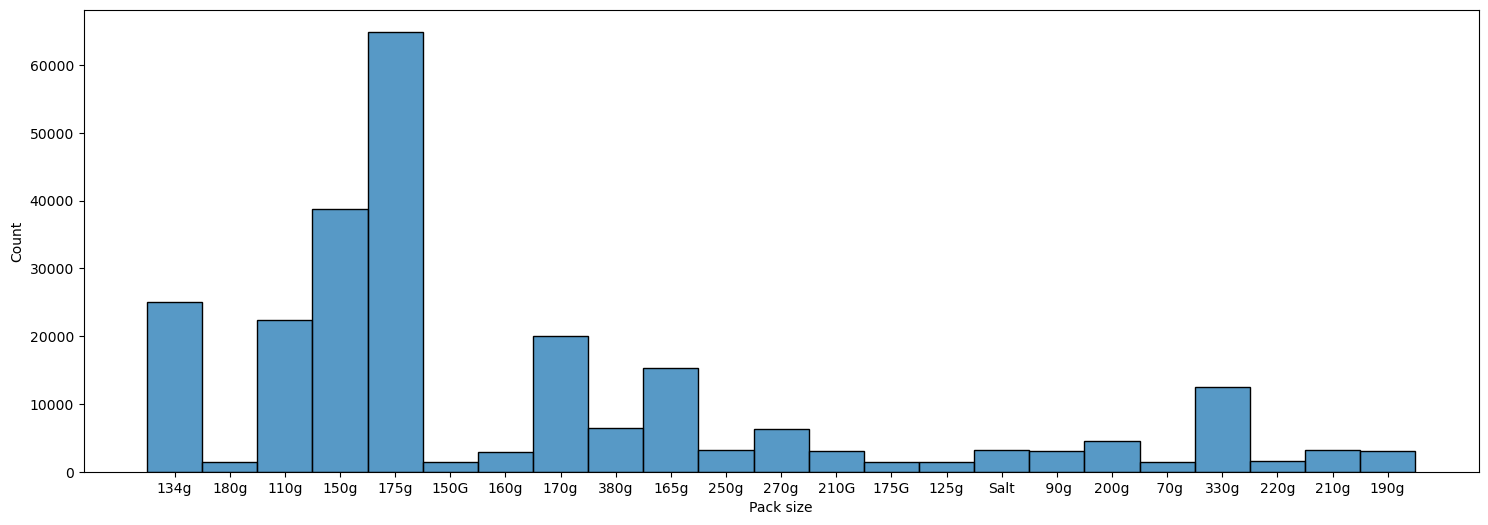

In [27]:
plt.figure(figsize=(18,6))
sns.histplot(x=df1['Pack size'])

In [28]:
df1['Brand']=df1['PROD_NAME'].apply(lambda x:x.split(' ')[0])
df1['Brand'].value_counts().unique

C:\Users\Dell\AppData\Local\Temp\ipykernel_17088\345319149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Brand']=df1['PROD_NAME'].apply(lambda x:x.split(' ')[0])


<bound method Series.unique of Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: Brand, dtype: int64>

In [29]:
df1['Brand'].replace({'RRD':'RED','Red':'RED','Infzns':'Infuzions','Dorito':'Doritos','Smith':'Smiths','Snbts':'Sunbites','GrnWves':'Grain'},inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17088\1664466023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Brand'].replace({'RRD':'RED','Red':'RED','Infzns':'Infuzions','Dorito':'Doritos','Smith':'Smiths','Snbts':'Sunbites','GrnWves':'Grain'},inplace=True)


In [30]:
df1['Brand'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RED           16321
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Grain          7740
Tyrrells       6442
Natural        6050
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
Woolworths     1516
NCC            1419
French         1418
Name: Brand, dtype: int64

Text(0, 0.5, 'Total_sales')

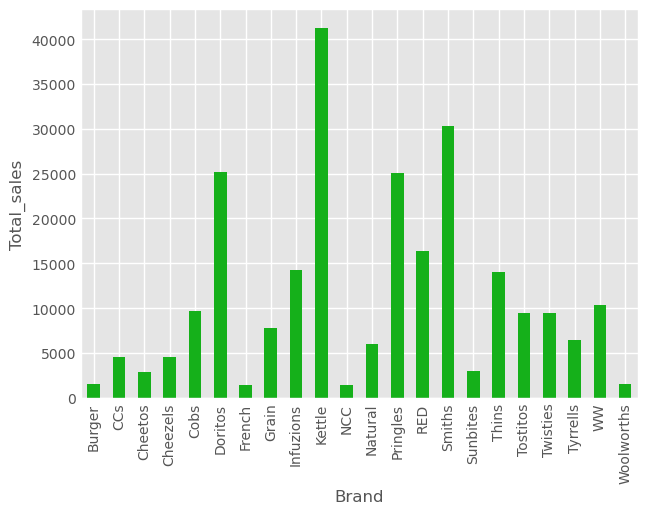

In [81]:
plt.style.use('ggplot')
X=df1.groupby(['Brand'])['TOT_SALES'].count()
X.plot(kind='bar',color='#15B01A')
plt.ylabel('Total_sales')

In [32]:
df2=pd.read_csv('QVI_purchase_behaviour.csv')
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [33]:
df2['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

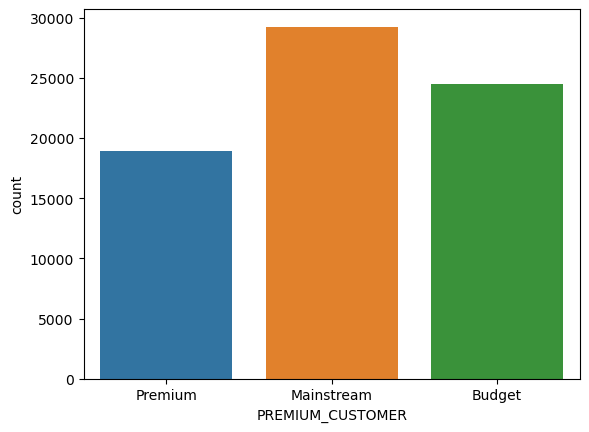

In [31]:
sns.countplot(df2['PREMIUM_CUSTOMER'])

In [32]:
df2['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

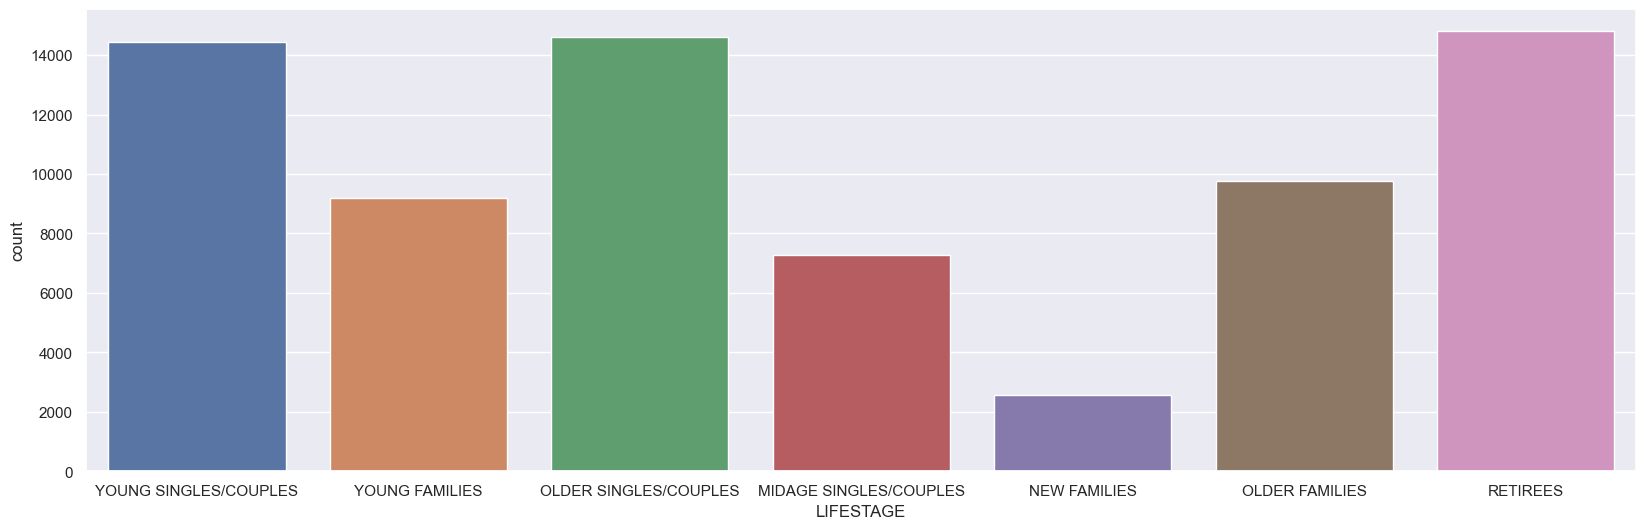

In [33]:
sns.set(font_scale=1.0)
plt.figure(figsize=(20,6))
sns.countplot(df2['LIFESTAGE'])

In [131]:
df3=pd.merge(df1,df2,'inner',on='LYLTY_CARD_NBR')
df3.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack size,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160g,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [132]:
df3.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Pack size           0
Brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [133]:
df4=df3.sort_values(['TOT_SALES'],ascending=False)
df4.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack size,Brand,LIFESTAGE,PREMIUM_CUSTOMER
172754,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g,Smiths,YOUNG FAMILIES,Budget
5350,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g,Smiths,MIDAGE SINGLES/COUPLES,Mainstream
160170,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g,Smiths,RETIREES,Premium
53410,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g,Smiths,OLDER FAMILIES,Mainstream
141501,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g,Smiths,RETIREES,Mainstream


In [134]:
df3.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()

DATE  STORE_NBR  LYLTY_CARD_NBR  \
LIFESTAGE              PREMIUM_CUSTOMER                                     
MIDAGE SINGLES/COUPLES Budget             4691       4691            4691   
                       Mainstream        11095      11095           11095   
                       Premium            7612       7612            7612   
NEW FAMILIES           Budget             2824       2824            2824   
                       Mainstream         2185       2185            2185   
                       Premium            1488       1488            1488   
OLDER FAMILIES         Budget            21514      21514           21514   
                       Mainstream        13241      13241           13241   
                       Premium           10403      10403           10403   
OLDER SINGLES/COUPLES  Budget            17172      17172           17172   
                       Mainstream        17061      17061           17061   
                       Premium           16560      16560           16560   
RETIREES               Budget            14225      14225           14225   
                       Mainstream        19970      19970           19970   
                       Premium           12236      12236           12236   
YOUNG FAMILIES         Budget            17763      17763           17763   
                       Mainstream        11947      11947           11947   
                       Premium           10784      10784           10784   
YOUNG SINGLES/COUPLES  Budget             8573       8573            8573   
                       Mainstream        19544      19544           19544   
                       Premium            5852       5852            5852   

                                         TXN_ID  PROD_NBR  PROD_NAME  \
LIFESTAGE              PREMIUM_CUSTOMER                                
MIDAGE SINGLES/COUPLES Budget              4691      4691       4691   
                       Mainstream         11095     11095      11095   
                       Premium             7612      7612       7612   
NEW FAMILIES           Budget              2824      2824       2824   
                       Mainstream          2185      2185       2185   
                       Premium             1488      1488       1488   
OLDER FAMILIES         Budget             21514     21514      21514   
                       Mainstream         13241     13241      13241   
                       Premium            10403     10403      10403   
OLDER SINGLES/COUPLES  Budget             17172     17172      17172   
                       Mainstream         17061     17061      17061   
                       Premium            16560     16560      16560   
RETIREES               Budget             14225     14225      14225   
                       Mainstream         19970     19970      19970   
                       Premium            12236     12236      12236   
YOUNG FAMILIES         Budget             17763     17763      17763   
                       Mainstream         11947     11947      11947   
                       Premium            10784     10784      10784   
YOUNG SINGLES/COUPLES  Budget              8573      8573       8573   
                       Mainstream         19544     19544      19544   
                       Premium             5852      5852       5852   

                                         PROD_QTY  TOT_SALES  Pack size  Brand  
LIFESTAGE              PREMIUM_CUSTOMER                                         
MIDAGE SINGLES/COUPLES Budget                4691       4691       4691   4691  
                       Mainstream           11095      11095      11095  11095  
                       Premium               7612       7612       7612   7612  
NEW FAMILIES           Budget                2824       2824       2824   2824  
                       Mainstream            2185       2185       2185   2185  
                       Premium               1

In [135]:
df3.groupby(['LYLTY_CARD_NBR'])['TOT_SALES'].sum()

LYLTY_CARD_NBR
1000        6.0
1002        2.7
1003        6.6
1004        1.9
1005        2.8
           ... 
2370651    13.0
2370701     7.2
2370751     9.2
2370961     8.4
2373711    11.4
Name: TOT_SALES, Length: 71287, dtype: float64

<AxesSubplot:title={'center':'Total Sales per LIFESTAGE,PREMIUM_CUSTOMER'}, xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

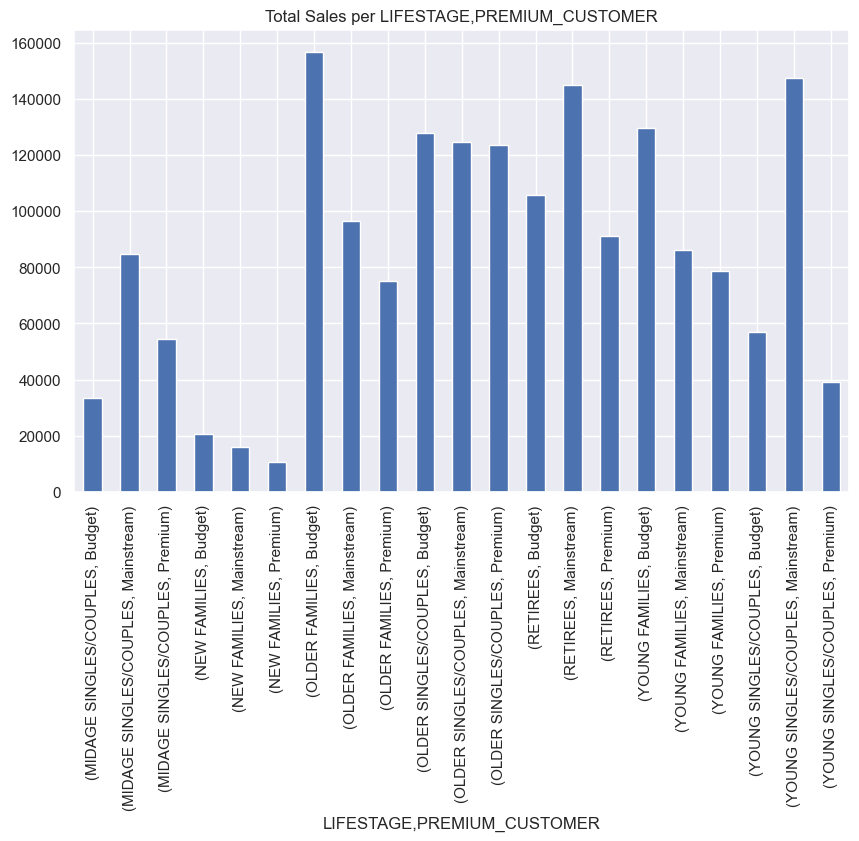

In [136]:
plt.figure(figsize=(10,6))
df3.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().plot(kind='bar',title='Total Sales per LIFESTAGE,PREMIUM_CUSTOMER')

<AxesSubplot:title={'center':'No of customer per LIFESTAGE,PREMIUM_CUSTOMER'}, xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

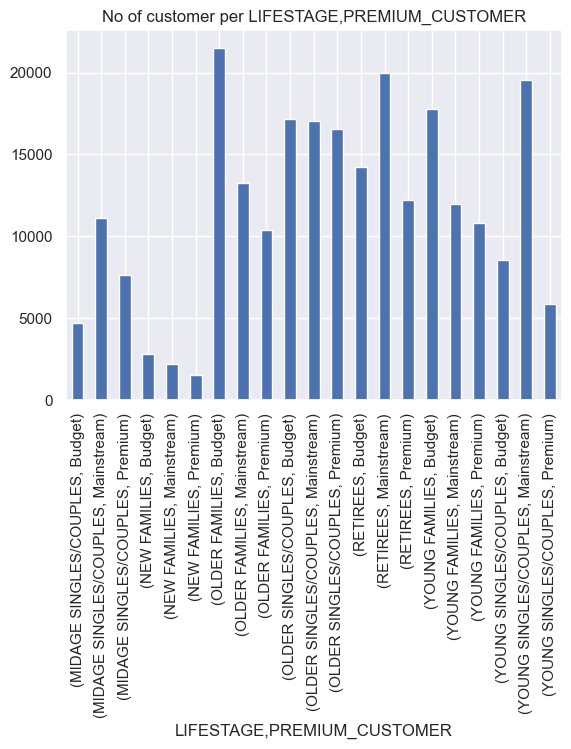

In [137]:
df3.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().plot(kind='bar',title='No of customer per LIFESTAGE,PREMIUM_CUSTOMER')

In [138]:
df3['Price per Unit']=df3['TOT_SALES']/df3['PROD_QTY']

In [139]:
df3.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,Price per Unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160g,WW,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


<AxesSubplot:title={'center':'Average Price per Unit'}, xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

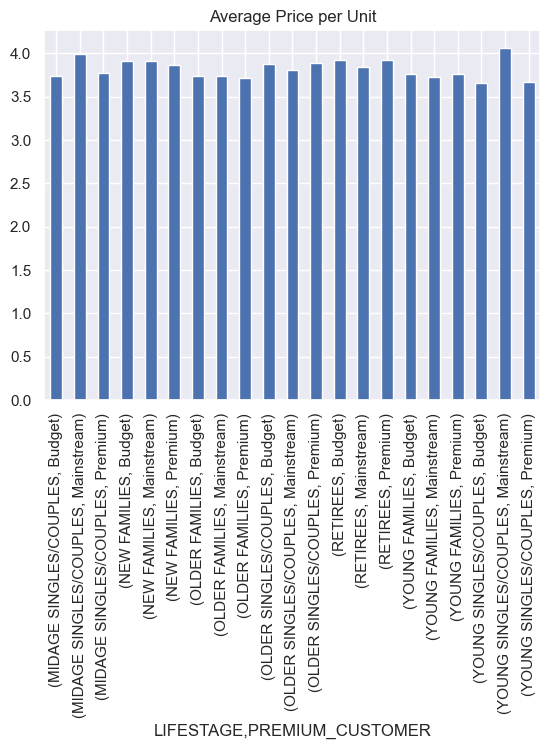

In [140]:
df3.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['Price per Unit'].mean().plot(kind='bar',title='Average Price per Unit')

In [141]:
btw=df3[df3['DATE'].between('2018-07-01','2019-06-30')]
btw=btw.sort_values('DATE',ascending=True)
btw['DATE'].value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

# Task 2

 now select the data  having store_number 77,86,88

In [143]:
df4=df3

In [144]:
df4.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,Price per Unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160g,WW,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [155]:
df4['Month ID']=df4["DATE"].apply(lambda x:x.to_period('M'))
df4

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,Price per Unit,Month ID
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.00,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10,2019-05
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160g,WW,MIDAGE SINGLES/COUPLES,Budget,1.90,2018-11
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10,2019-03
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40,2019-03
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40,2018-08
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40,2018-11
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90,2018-12


In [158]:
df4['STORE_NBR'].value_counts()

226    1916
88     1786
165    1741
237    1714
93     1699
       ... 
85        2
252       2
206       2
92        1
76        1
Name: STORE_NBR, Length: 271, dtype: int64

In [165]:
df4.groupby(['STORE_NBR','Month ID'])['TOT_SALES'].sum()

STORE_NBR  Month ID
1          2018-07     188.9
           2018-08     168.4
           2018-09     268.1
           2018-10     175.4
           2018-11     184.8
                       ...  
272        2019-02     385.3
           2019-03     421.9
           2019-04     445.1
           2019-05     314.6
           2019-06     301.9
Name: TOT_SALES, Length: 3165, dtype: float64

In [168]:
df4.groupby(['STORE_NBR','Month ID'])['LYLTY_CARD_NBR'].count()

STORE_NBR  Month ID
1          2018-07     49
           2018-08     41
           2018-09     59
           2018-10     40
           2018-11     45
                       ..
272        2019-02     47
           2019-03     51
           2019-04     56
           2019-05     40
           2019-06     36
Name: LYLTY_CARD_NBR, Length: 3165, dtype: int64

In [181]:
df4.groupby(['STORE_NBR','Month ID','LYLTY_CARD_NBR'])['PROD_NBR'].count()

STORE_NBR  Month ID  TXN_ID
1          2018-07   12        1
                     34        1
                     45        1
                     62        1
                     64        1
                              ..
272        2019-06   270136    1
                     270146    1
                     270161    1
                     270166    1
                     270172    1
Name: PROD_NBR, Length: 245257, dtype: int64

In [182]:
df4['LYLTY_CARD_NBR'].value_counts()

230078    17
162039    17
128178    16
179228    16
113080    16
          ..
2394       1
2365       1
2303       1
2287       1
272380     1
Name: LYLTY_CARD_NBR, Length: 71287, dtype: int64

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
95     1432
11     1431
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 105, dtype: int64